# Fundamentals of Machine Learning - Exercise 4(a)
Deadline: 12.01.2021, 16:00

Johannes Kammerer, Zhao Sun, Tong Yu

In [1]:
import pandas as pd                                    
import numpy as np                                      
import matplotlib.pyplot as plt         
%matplotlib inline
import seaborn as sns
from IPython.display import display, Markdown, Latex

## Red Cards Study
### 1. Loading and Cleaning the Data (10 points)


- What do the feature names (e.g. column games) stand for?
- Which irrelevant features might be dropped?
- What relevant features might be missing, but can be computed? E.g., you can obtain the age of a player (which might be relevant) from his birthday, or create entirely new features by non-linear combinations of existing ones.
- Are there missing data values (e.g. missing skin color ratings), and how should they be dealt with? (see https://en.wikipedia.org/wiki/Missing_data)
- How good are the skin color ratings? Do the raters agree?
- Should referees with very few appearances be excluded from the dataset?
- Should features be normalized and/or centralized? 

Categorical features (e.g. league) should be transformed to a one-hot encoding (see https://en.wikipedia.org/wiki/One-hot). In case of league, you can also repreat the experiment independently for the different leagues to check if there are differences between countries. Provide a detailed description and justification of your data preparation.

In [2]:
df = pd.read_csv('CrowdstormingDataJuly1st.csv')

# set options to display full range of columns
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

display(df.columns, df.size, df.head())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp'],
      dtype='object')

4088784

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,1,0,0,1,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,0,0,0,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,0,0,0,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


Num of dyads with missing photos = 21407 (14.659517% of total dyads) 

Num of players with missing photos = 468 (23.008850% of unique players) 

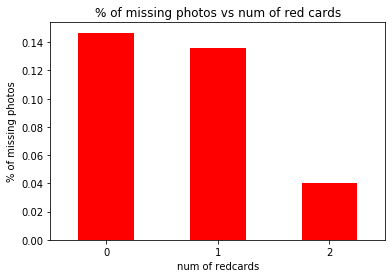

% of redCards (all) = 1.238804% vs. <br>% of redCards (without photos) = 1.139814%

As evidenced above, we can assume the missing photos are at random and therefore treat missing values by omission, i.e. dropping all NaNs from dataset.

In [312]:
# Consider missing photos
df['redCards'].value_counts() #144219 #1784 #25
df['redCards'][df.photoID.isna()].value_counts() #21163 #243 #1

display(Markdown("Num of dyads with missing photos = {} ({:%} of total dyads) ".format(len(df['redCards'][df.photoID.isna()]), len(df['redCards'][df.photoID.isna()])/len(df['redCards']))))

display(Markdown("Num of players with missing photos = {} ({:%} of unique players) ".format(len(df['player'][df.photoID.isna()].unique()),len(df['player'][df.photoID.isna()].unique())/len(df['player'].unique()))))


(df['redCards'][df.photoID.isna()].value_counts() / df['redCards'].value_counts()).plot.bar(rot=0, color='red')
plt.title("% of missing photos vs num of red cards"), plt.xlabel('num of redcards'), plt.ylabel('% of missing photos')
plt.show()

display(Markdown('% of redCards (all) = {:%} vs. <br>% of redCards (without photos) = {:%}'.format(df['redCards'][df.redCards!=0].count() / df['redCards'].count(), df['redCards'][df.photoID.isna()][df.redCards!=0].count() / df['redCards'][df.photoID.isna()].count())))
display(Markdown('As evidenced above, we can assume the missing photos are at random and therefore treat missing values by omission, i.e. dropping all NaNs from dataset.'))


Observation: c. 2/3 of all referees were involved in less than 22 dyads, i.e. not full game information

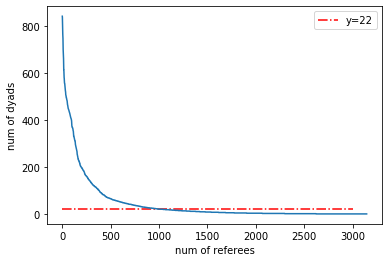

% of referees who has at least 22 dyads = 31.712742%

% of dyads with referees who has at least 22 dyads = 91.421508%

% of red cards issues by referees with at least 22 dyads:

0    0.913846
1    0.942825
2    1.000000
Name: redCards, dtype: float64

**However, if we do not consider referee as a particular feature of the player, then we should not exclude any referee.**

In [417]:
# Consider referees with few games
display(Markdown("Observation: c. 2/3 of all referees were involved in less than 22 dyads, i.e. not full game information"))
plt.plot(-np.sort(-df.refNum.value_counts())) # sort by descending order
plt.hlines(y = 22, xmin=0, xmax=3000,colors='red', linestyles='dashdot', label='y=22', )
plt.xlabel('num of referees')
plt.ylabel('num of dyads')
plt.legend()
plt.show()

refNum22 = df.refNum.value_counts()[df.refNum.value_counts()>=22].index
display(Markdown('% of referees who has at least 22 dyads = {:%}'.format(len(refNum22) / len(df.refNum.unique()))))
display(Markdown('% of dyads with referees who has at least 22 dyads = {:%}'.format(df.refNum.isin(refNum22).sum() / len(df.refNum))))

display(Markdown('% of red cards issues by referees with at least 22 dyads:'))
display(df.redCards[df.refNum.isin(refNum22)].value_counts() / df.redCards.value_counts())

display(Markdown("**However, if we do not consider referee as a particular feature of the player, then we should not exclude any referee.**"))


In [6]:
# Preprocessing: removing NAN and keeping only revelant features

relevant_features = ['playerShort', 'club', 'leagueCountry', 'birthday', 'height', 'weight', 'position', 
                     'games', 'victories', 'ties', 'defeats', 'goals', 'yellowCards', 'yellowReds', 'redCards', 'rater1', 'rater2']

#df1 = df[relevant_features][df.refNum.isin(refNum22)].dropna().drop_duplicates() #len(df1) #146028 --dropna #115603 -- drop_duplicates #115603

df1 = df[relevant_features].dropna().drop_duplicates()

display(Markdown('**Overview after removing all #NaN**'))
#display(Markdown("num of referees: {} ({:%} of total)".format(len(df1.refNum.value_counts()), len(df1.refNum.unique())/len(df.refNum.unique())))) #2904
#display(Markdown("num of referee countries: {}".format(len(df1.refCountry.unique()))))
display(Markdown("num of dyads: {} ({:%} of total)".format(len(df1), len(df1)/len(df))))
display(Markdown("num of redCards:[#0,#1,#2]-->{} % of total: {}".format(df1.redCards.value_counts().to_list(), (df1.redCards.value_counts()/df.redCards.value_counts()).values))) # 0: 114148; 1: 1432; 2: 23

display(Markdown('num of unique players: {} ({:%} of total)'.format(df1.playerShort.unique().size,df1.playerShort.unique().size/df.playerShort.unique().size))) #1406
display(Markdown("num of players with missing photos (removed) = {} ({:%} of unique players) ".format(len(df['playerShort'][df.photoID.isna()].unique()),len(df['playerShort'][df.photoID.isna()].unique())/len(df['playerShort'].unique()))))

display(Markdown('num of clubs: {} ({:%} of total)'.format(len(df1.club.value_counts()),len(df1.club.unique())/len(df.club.unique())))) #92 unique clubs
display(Markdown('league countries: {}'.format(df1.leagueCountry.unique()))) #array(['Spain', 'France', 'England', 'Germany'], dtype=object)
display(Markdown("num of positions: {} {}".format(len(df1.position.unique()),df1.position.unique())))
display(Markdown("position excluded from original dataset:"))
for x in df.position.unique():
    if x not in df1.position.unique():
        print(x)


**Overview after removing all #NaN**

num of dyads: 57630 (39.465034% of total)

num of redCards:[#0,#1,#2]-->[56194, 1413, 23] % of total: [0.38964353 0.79204036 0.92      ]

num of unique players: 1419 (69.118363% of total)

num of players with missing photos (removed) = 468 (22.795908% of unique players) 

num of clubs: 92 (77.966102% of total)

league countries: ['Spain' 'France' 'England' 'Germany']

num of positions: 12 ['Attacking Midfielder' 'Right Winger' 'Center Back' 'Left Fullback'
 'Defensive Midfielder' 'Goalkeeper' 'Right Fullback' 'Left Winger'
 'Left Midfielder' 'Center Midfielder' 'Right Midfielder' 'Center Forward']

position excluded from original dataset:

nan


**Discrepency of skin tone ratings**

Text(0.5, 1.0, 'Delta (rater2 - rater1)')

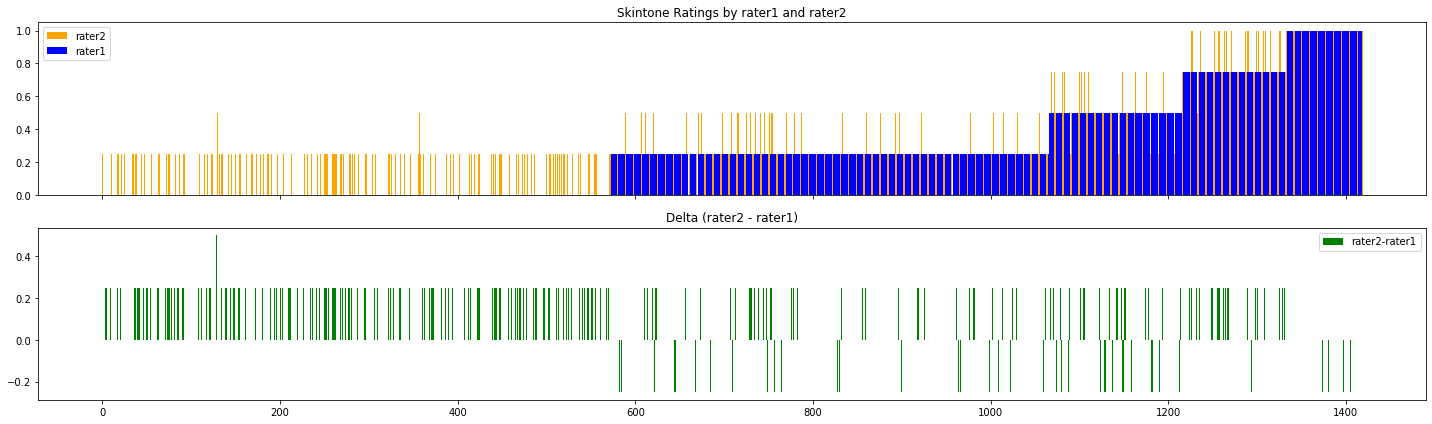

In [7]:
display(Markdown("**Discrepency of skin tone ratings**"))

df2 = df1.drop_duplicates(subset = 'playerShort')[['rater1','rater2']].sort_values(by=['rater1'])

fig, ax = plt.subplots(2,1,sharex=True,figsize=(20,6),tight_layout = True)

ax[0].bar(x=np.arange(len(df2))+0.4, height=df2.rater2,color='orange',label='rater2')
ax[0].bar(x=np.arange(len(df2))-0.4, height=df2.rater1,color='blue',label='rater1')
ax[0].legend()
ax[0].set_title('Skintone Ratings by rater1 and rater2')

ax[1].bar(x=np.arange(len(df2))-0.4, height=df2.rater2-df2.rater1,color='green',label='rater2-rater1')
ax[1].legend()
ax[1].set_title("Delta (rater2 - rater1)")

In [28]:
# Preprocessing: Adding new features: age (as of 2013.01.01) and BMI 
import datetime
dateRef = datetime.datetime(2013,1,1)
year = datetime.timedelta(days=365)
df1['age_2013'] = (dateRef - pd.to_datetime(df1.birthday))/year
df1['BMI'] = df1.weight / np.square(df1.height/100)
df1['skinTone'] = (df1.rater1+df1.rater2)/2 

# Preprocessing: Centerizing data / de-mean
df1.skinTone =  df1.skinTone - df1.skinTone.mean()
df1.age_2013 = df1.age_2013 - df1.age_2013.mean()
df1.height = df1.height - df1.height.mean()
df1.weight = df1.weight - df1.weight.mean()
df1.BMI = df1.BMI - df1.BMI.mean()


# Preprocessing: One-hot encodeing for all categorical features
leagueCountry = pd.get_dummies(df1["leagueCountry"],prefix='country')
leagueCountry.index=df1.index #playerShort

club = pd.get_dummies(df1['club'],prefix='club')
club.index=df1.index #playerShort

position = pd.get_dummies(df1['position'], prefix='position')
position.index=df1.index #playerShort


# Combining into new dataframe

df2 = df1[['playerShort','redCards','yellowCards','yellowReds','goals','games','defeats','ties','victories']].groupby('playerShort').sum()
df3 = df1[['playerShort','skinTone','age_2013','height', 'weight', 'BMI']].join([leagueCountry,club,position]).drop_duplicates()
df4 = df3.merge(df2,left_on = 'playerShort',right_on='playerShort')

redCards = df4.redCards/df4.games
players=df4.playerShort
features = df4.drop(columns=['redCards','playerShort'])

In [29]:
display(players)
display(redCards)
display(features)

0       lucas-wilchez     
1       john-utaka        
2       aaron-hughes      
3       aleksandar-kolarov
4       alexander-tettey  
              ...         
1414    marc-stendera     
1415    senah-mango       
1416    wesley-jobello    
1417    momar-bangoura    
1418    baptiste-aloe     
Name: playerShort, Length: 1419, dtype: object

0       0.018519
1       0.005917
2       0.000000
3       0.009050
4       0.000000
          ...   
1414    0.000000
1415    0.000000
1416    0.000000
1417    0.000000
1418    0.000000
Length: 1419, dtype: float64

,skinTone,age_2013,height,weight,BMI,country_England,country_France,country_Germany,country_Spain,club_1. FC Nürnberg,club_1. FSV Mainz 05,club_1899 Hoffenheim,club_AC Ajaccio,club_AS Nancy,club_AS Saint-Étienne,club_Arsenal FC,club_Arsenal FC (R),club_Aston Villa,club_Athletic Bilbao,club_Atlético Madrid,club_Bayer Leverkusen,club_Bayern München,club_Blackburn Rovers,club_Bolton Wanderers,club_Bor. Mönchengladbach,club_Borussia Dortmund,club_CA Osasuna,club_CF Badalona,club_Celta Vigo,club_Chelsea FC,club_Crewe Alexandra,club_Deportivo La Coruña,club_ESTAC Troyes,club_Eintracht Frankfurt,club_Espanyol Barcelona,club_Everton FC,club_FC Augsburg,club_FC Barcelona,club_FC Lorient,club_FC Schalke 04,club_FC Sochaux,club_Fortuna Düsseldorf,club_Fulham FC,club_Getafe CF,club_Girondins Bordeaux,club_Granada CF,club_Hamburger SV,club_Hannover 96,club_Leeds United,club_Levante UD,club_Lille OSC,club_Liverpool FC,club_Liverpool FC (R),club_MSV Duisburg,club_Manchester City,club_Manchester United,club_Millwall FC,club_Montpellier HSC,club_Málaga CF,club_Newcastle United,club_Norwich City,club_Nottingham Forest,club_OGC Nice,club_Olympique Lyon,club_Olympique Marseille,club_Paris Saint-Germain,club_Queens Park Rangers,club_RCD Mallorca,club_Rayo Vallecano,club_Reading FC,club_Real Betis,club_Real Madrid,club_Real Madrid Castilla,club_Real Sociedad,club_Real Valladolid,club_Real Zaragoza,club_SC Bastia,club_SC Freiburg,club_SD Compostela,club_SV Sandhausen,club_Sevilla FC,club_Southampton FC,club_SpVgg Greuther Fürth,club_Stade Brest,club_Stade Reims,club_Stade Rennes,club_Stoke City,club_Sunderland AFC,club_Tottenham Hotspur,club_Tottenham Hotspur (R),club_Toulouse FC,club_Valencia CF,club_Valenciennes FC,club_VfB Stuttgart,club_VfL Wolfsburg,club_Werder Bremen,club_West Bromwich Albion,club_West Ham United,club_Wigan Athletic,club_Wolverhampton Wanderers,club_Évian Thonon Gaillard,position_Attacking Midfielder,position_Center Back,position_Center Forward,position_Center Midfielder,position_Defensive Midfielder,position_Goalkeeper,position_Left Fullback,position_Left Midfielder,position_Left Winger,position_Right Fullback,position_Right Midfielder,position_Right Winger,yellowCards,yellowReds,goals,games,defeats,ties,victories
0,0.375,1.466912,-4.876922,-4.211036,-1.221674e+04,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,18,1,9,108,33,28,47
1,0.750,2.549104,-2.876922,5.788964,-3.451931e+03,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,31,0,76,338,111,83,144
2,0.125,5.524446,0.123078,-5.211036,-3.450470e+06,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,18,0,8,529,185,152,192
3,0.125,-0.648157,5.123078,3.788964,-9.002600e+03,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,44,4,22,221,66,47,108
4,1.000,-1.127609,-1.876922,-8.211036,-3.375427e+04,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,26,0,11,136,44,41,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

### 2 Model Creation (8 points)

Given features Xi of player i, we want to predict $Y_i = N_{i,red} / N_i$, the fraction of games where the player will receive a red card. We will solve this problem using two model types: linear regression and regression forests.

Implement both models and determine their squared test errors by means of cross-validation. Alternatively (or in addition to this will result in bonus points), you can also try to predict $Y_i = p(red | X_i)$ via the posterior of a classification model.

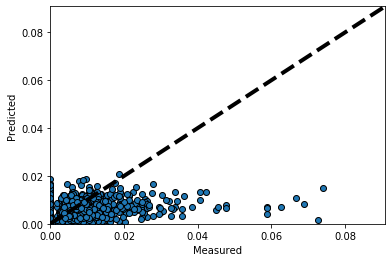

In [62]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

LR_model = LinearRegression()
#LR_model.fit(X=features, y =redCards)

#LR_MSE = np.square(LR_model.predict(X=features) - redCards).sum()
#display(Markdown('Linear Regression MSE score = {:f}'.format(LR_MSE)))

#prediction = LR_model.predict(X=features)
#plt.plot(prediction-redCards,color='blue',marker='.',linewidth=0)
#plt.title("Linear Regression - delta between prediction and actual")
#plt.xlabel('player index')
#plt.ylabel('$N_{i,red} / N_i$')

predicted = cross_val_predict(LR_model, X=features, y=redCards, cv=10)
fig, ax = plt.subplots()
ax.scatter(redCards, predicted, edgecolors=(0, 0, 0))
ax.plot([redCards.min(), redCards.max()], [redCards.min(), redCards.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_xlim((redCards.min(), redCards.max()))
ax.set_ylim((redCards.min(), redCards.max()))

plt.show()

In [81]:
# Regression Forest

class Node:
    def __init__(self):
        pass 

class Tree:
    def __init__(self):
        self.root = Node()
    
    def find_leaf(self, x):
        node = self.root
        while hasattr(node, "feature"): # leaf node has no 'feature' attribute
            j = node.feature
            if x[j] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node

    
class DecisionTree(Tree):
    def __init__(self):
        super(DecisionTree, self).__init__()
        
    def train(self, data, labels, n_min=20):
        '''
        data: the feature matrix for all digits
        labels: the corresponding ground-truth responses
        n_min: termination criterion (don't split if a node contains fewer instances)
        '''
        N, D = data.shape
        D_try = int(np.sqrt(D)) # how many features to consider for each split decision

        # initialize the root node
        self.root.data = data
        self.root.labels = labels
        
        stack = [self.root]
        while len(stack): 
            node = stack.pop()    # check the last node on the stack
            
            #print("Node >>> ", node.data.shape)
            
            n = node.data.shape[0]    # number of instances in present node
            if(n >= n_min):
                # Call 'make_decision_split_node()' with 'D_try' randomly selected feature indices. 
                # This turns 'node' into a split node and returns the two children, which must be placed on the 'stack'.
                feature_indices = np.random.permutation(D)[:D_try]
                left, right = make_decision_split_node(node, feature_indices)
                if left is not None:
                    stack.append(left)
                    stack.append(right)
            else:
                # Call 'make_decision_leaf_node()' to turn 'node' into a leaf node.
                if (node.labels.size > 0):
                    make_decision_leaf_node(node)
                
                
    def predict(self, x): # here x is single data point        
        leaf = self.find_leaf(x)
        return leaf.response 
    

def calc_sse(labels):
    "Calculate the sum of squared errors between ground truth and prediction"
    sse = np.square(labels - labels.mean()).sum()
    return sse

def make_decision_split_node(node, feature_indices):
    '''
    node: the node to be split
    feature_indices: a numpy array of length 'D_try', containing the feature 
                     indices to be considered in the present split
    '''
    n, D = node.data.shape

    # find best feature j (among 'feature_indices') and best threshold t for the split
    j_min, t_min = None, None
    
    sse_parent = calc_sse(node.labels)
    sse_min = sse_parent
    left_min = None
    right_min = [i for i in range(len(node.labels))]
    
    for j in feature_indices:
        # Hint: For each feature considered, first remove duplicate feature values using 'np.unique()'. 
        # Describe here why this is necessary --> this reduces the computation of looping over all training data to test all the mid-points in-between, where a lot of these pixels are of the same values
        data_unique = np.unique(node.data[:, j])
        
        # Compute candidate thresholds
        tj = ((data_unique[1:]+data_unique[:-1])/2).astype(int)
        
        # Illustration: for loop - hint: vectorized version is possible
        for t in tj:
            left_indices = np.nonzero(node.data[:, j] <= t)[0] 
            right_indices = np.nonzero(node.data[:, j] > t)[0]
            
            # Compute the sse scores for children
            sse_left = calc_sse(node.labels[left_indices])
            sse_right = calc_sse(node.labels[right_indices])
            
            # choose the best threshold with minimize the sum of children's sse scores
            if ((sse_left + sse_right) < sse_min):
                sse_min = sse_left + sse_right
                j_min = j
                t_min = t
                left_min = left_indices
                right_min = right_indices

    #if(right_min == None):
        
    # create children
    left = Node()
    right = Node()

    # initialize 'left' and 'right' with the data subsets and labels according to the optimal split found above
    left.data = node.data[left_min,:] # data in left node
    left.labels = node.labels[left_min] # corresponding labels
    right.data = node.data[right_min,:]
    right.labels = node.labels[right_min]

    # turn the current 'node' into a split node (store children and split condition)
    node.left = left
    node.right = right
    node.feature = j_min
    node.threshold = t_min

    return left, right    


def make_decision_leaf_node(node):
    '''
    node: the node to become a leaf
    '''
    # compute and store leaf response
    node.N = node.labels.size

    # The response of leaf bl is the average response of the training instances assigned to this leaf
    node.response = node.labels.mean()
    


class DecisionForest():
    def __init__(self, n_trees):
        # create ensemble
        self.trees = [DecisionTree() for i in range(n_trees)]
        self.n_trees = n_trees
    
    def train(self, data, labels, n_min=0):
        N_total = len(labels)
        N_subset = int(0.368*N_total)
        for tree in self.trees:
            # train each tree, using a bootstrap sample of the data
            subset_indices = np.random.permutation(N_total)[:N_subset]
            tree.train(data[subset_indices], labels[subset_indices])
            
    def predict(self, x):
        # compute the ensemble prediction
        prediction = []
        for tree in self.trees:
            prediction.append(tree.predict(x))
        
        result = np.mean(prediction)
        return result 

In [ ]:
data = features.to_numpy()
labels = redCards.to_numpy()

display(data.shape, labels.shape)
decision_tree = DecisionTree()
decision_tree.train(data, labels)
### THIS TAKES A LONG TIME TO RUN...

predictions = []
for x in data:
    predictions.append(decision_tree.predict(x))

plt.plot(np.array(prediction)-redCards,color='blue',marker='.',linewidth=0)
plt.title("Decision Tree - delta between prediction and actual")
plt.xlabel('player index')
plt.ylabel('$N_{i,red} / N_i$')


(1419, 120)

(1419,)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: Mean of empty slice.


In [64]:
data = features
labels = redCards

decision_forest = DecisionForest(n_trees=20)
decision_forest.train(data, labels)

predictions = []
for x in data:
    predictions.append(decision_forest.predict(x))

rebase = np.unique(labels,return_counts=True)[1]

from sklearn.metrics import confusion_matrix
confusion_forest = confusion_matrix(labels, predictions) / rebase *100

from seaborn import heatmap
heatmap(confusion_forest,annot=True,fmt=".1f",cbar=False) 
print("Confusion Forest - Prediction Accuracy Training")

KeyError: "None of [Int64Index([ 629,  591, 1223,   72,  709,  507,  925, 1100, 1322, 1029,\n            ...\n             385,  217, 1368,   62, 1063, 1263,  186, 1304, 1071,  494],\n           dtype='int64', length=522)] are in the [columns]"

### 3 Answering the Research Question (6 points)

Now perform a permutation test to answer the research question. To this end, create 19 new training sets where the skin color variable is randomly shuffled among the players. Each dataset uses a different permutation of skin colors, but keeps all other features and the response intact. This ensures that any possible association between skin colors and responses $Y^∗_i$ is destroyed, whereas the marginal skin color distribution gets preserved.

Determine the squared errors of the two model types on these new datasets by cross-validation as well. If all 19 datasets exhibit higher test errors than the original unscattered dataset, you can conclude that there is a skin color bias in red card decisions with a p-value of p = 1/20 = 0.05. If so, determine the direction of the bias by comparing the average of the $Y^∗_i$ for light and dark colored players

### 4 How to lie with statistics (6 points)

Play with the data cleaning procedure with the following goal: Find two equally plausible cleaned datasets that give opposite answers to the research question, i.e. one uncovers a skin color bias, and the other does not. If you succeed in finding such datasets, it demonstrates how easy it is in practice to tweak the data in the direction of the desired outcome, and how careful one needs to be conducting statistical research and interpreting published results.


### 5 Alternative hypotheses (6 points)

Keep in mind that a statistical analysis like this can only reveal correlations between features and response, but says nothing about the direction of causality (statistical analysis of causality is also possible, but requires more powerful methods and larger datasets). Provide two alternative plausible causal hypotheses, besides the obvious referees discriminate against dark colored players, that might explain a possible correlation. Test your hypotheses with the data at hand.